# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | anibare
City not found. Skipping...
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | recani
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | saint-pierre
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | mantsala
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | baltinava
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | fort st. john
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | thompson
Processing Record 

Processing Record 38 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | naze
Processing Record 41 of Set 4 | tynda
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | camaqua
Processing Record 44 of Set 4 | nova xavantina
Processing Record 45 of Set 4 | banjarmasin
Processing Record 46 of Set 4 | hassi messaoud
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | fort mcmurray
Processing Record 49 of Set 4 | smara
Processing Record 0 of Set 5 | tazovsky
Processing Record 1 of Set 5 | tougan
Processing Record 2 of Set 5 | northam
Processing Record 3 of Set 5 | uturoa
Processing Record 4 of Set 5 | shanhaiguan
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | bandar abbas
Processing Record 7 of Set 5 | wailua homesteads
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | bahia de kino
Processing Record 10 of Set 5 | kod

Processing Record 28 of Set 8 | garden city
Processing Record 29 of Set 8 | vadso
Processing Record 30 of Set 8 | holualoa
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | acajutla
Processing Record 33 of Set 8 | ca mau
Processing Record 34 of Set 8 | thenia
Processing Record 35 of Set 8 | la sarre
Processing Record 36 of Set 8 | hayma'
City not found. Skipping...
Processing Record 37 of Set 8 | kidal
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | okahao
Processing Record 40 of Set 8 | cole harbour
Processing Record 41 of Set 8 | grand falls-windsor
Processing Record 42 of Set 8 | sandefjord
Processing Record 43 of Set 8 | kuanda
Processing Record 44 of Set 8 | beyneu
Processing Record 45 of Set 8 | bodaybo
Processing Record 46 of Set 8 | tyukhtet
Processing Record 47 of Set 8 | castillos
Processing Record 48 of Set 8 | puerto lempira
Processing Record 49 of Set 8 | mogocha
Processing Record 0 of Set 9 | annau
Processing Reco

Processing Record 17 of Set 12 | mahebourg
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,274.80,72,45,6.00,TF,1691551410
1,whitehorse,60.7161,-135.0538,289.58,82,40,1.03,CA,1691551249
2,grytviken,-54.2811,-36.5092,271.30,91,31,4.60,GS,1691551148
3,recani,31.2846,-4.2688,304.42,23,43,3.16,MA,1691551412
4,lazaro cardenas,17.9583,-102.2000,302.04,84,25,3.15,MX,1691550867


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.80,72,45,6.00,TF,1691551410
1,whitehorse,60.7161,-135.0538,289.58,82,40,1.03,CA,1691551249
2,grytviken,-54.2811,-36.5092,271.30,91,31,4.60,GS,1691551148
3,recani,31.2846,-4.2688,304.42,23,43,3.16,MA,1691551412
4,lazaro cardenas,17.9583,-102.2000,302.04,84,25,3.15,MX,1691550867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

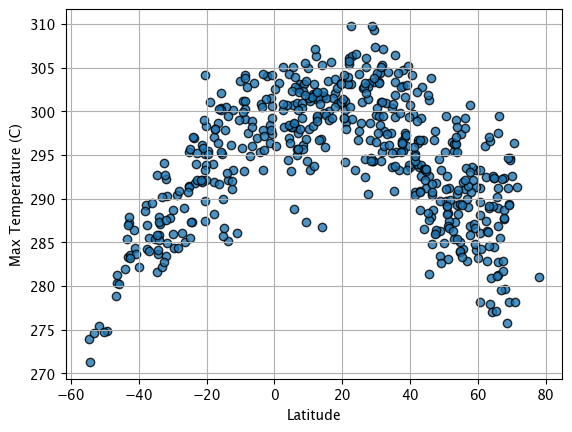

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

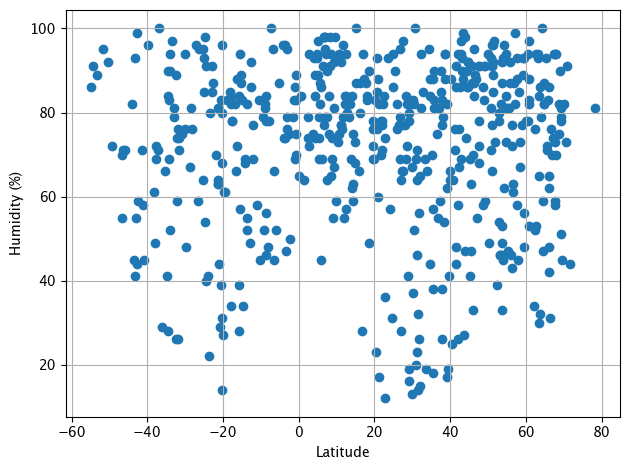

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

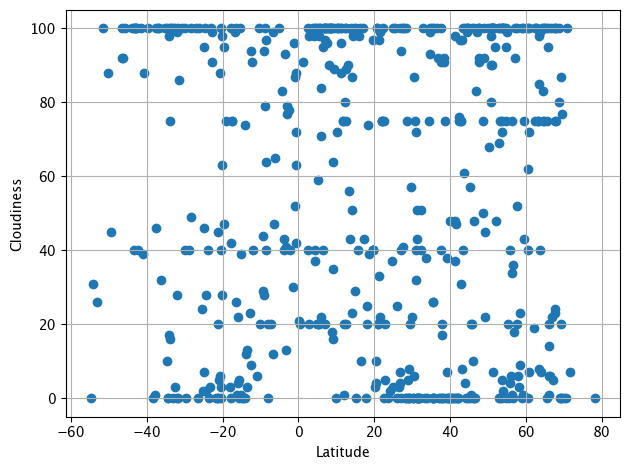

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE